In [4]:
%matplotlib ipympl

from onix.analysis.timing_diagram import plot
from onix.data_tools import get_experiment_data
import numpy as np
import matplotlib.pyplot as plt
from onix.awg_maps import get_channel_from_name, awg_channels

In [2]:
data, headers = get_experiment_data(2552361)

In [3]:
headers["data_info"]

{'name': 'Simple LF Spectroscopy Quick State Prep',
 'data_number': 2552361,
 'save_time': '2024-08-02 12:54:42',
 'save_epoch_time': 1722617682.084287}

In [13]:
headers["sequence"]

In [4]:
headers["sequence"]._segment_steps

[('__start', 1),
 ('optical_cb', 25),
 ('break', 1),
 ('optical_ac', 25),
 ('break', 1),
 ('lfpiov2', 1),
 ('break', 1),
 ('shutter_break', 300),
 ('detect', 128),
 ('break', 200),
 ('break', 1),
 ('rf_abarbbar', 1),
 ('break', 1),
 ('lf_14', 1),
 ('break', 1),
 ('rf_abarbbar', 1),
 ('break', 1),
 ('shutter_break', 300),
 ('detect', 128),
 ('break', 200),
 ('break', 1),
 ('__end', 1)]

In [5]:
headers["sequence"]._segments["optical_cb"].duration

1 <Unit('millisecond')>

In [7]:
s = headers["sequence"]._segments["optical_cb"]

In [8]:
s._awg_pulses

{1: <onix.sequences.sequence.AWGSinePulse at 0x7f6807521d60>,
 0: <onix.sequences.sequence.AWGZero at 0x7f6807521e50>,
 2: <onix.sequences.sequence.AWGZero at 0x7f6807521e20>,
 3: <onix.sequences.sequence.AWGZero at 0x7f6807521eb0>,
 4: <onix.sequences.sequence.AWGZero at 0x7f6807521f10>,
 5: <onix.sequences.sequence.AWGZero at 0x7f6807521f40>,
 6: <onix.sequences.sequence.AWGZero at 0x7f6807521f70>,
 7: <onix.sequences.sequence.AWGZero at 0x7f6807521fa0>}

In [9]:
awg_channels[1]

{'name': 'ao_dp',
 'desc': 'double pass aom connected to ZHL-1-2W+ (29 dB gain)',
 'max_allowed_amplitude': 3200}

In [10]:
p = s._awg_pulses[1]

In [11]:
p._amplitude

2000

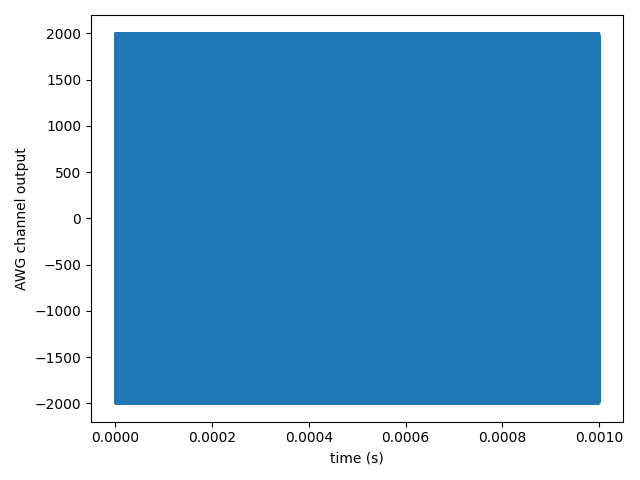

In [12]:
times = np.arange(0, headers["sequence"]._segments["optical_cb"].duration.to("s").magnitude, 1e-9)
fig, ax = plt.subplots()
ax.set_xlabel("time (s)")
ax.set_ylabel("AWG channel output")
ax.plot(times, s._awg_pulses[1].output(times))
plt.tight_layout()
plt.show()

In [20]:
headers["sequence"]._segments["break"].duration

10 <Unit('microsecond')>

In [23]:
headers["sequence"]._segments["detect"].duration

25.0 <Unit('microsecond')>

In [7]:
plot(3135974)

KeyError: 'T_0'